In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange
import scipy.stats
from sklearn.metrics import explained_variance_score
import matplotlib as mpl

In [3]:
C4_diff_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_rep1.npz")["E_scale"]
C4_nona_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_rep1.npz")["E_scale"]
C8_diff_scale = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_rep1.npz")["E_scale"]
C8_nona_scale = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_rep1.npz")["E_scale"]
C12_diff_scale = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_rep1.npz")["E_scale"]
C12_nona_scale = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_rep1.npz")["E_scale"]

C4_dist_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust4_syn_dist.npy")[:,-1]
C8_dist_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/data/clust8_syn_dist.npy")[:,-1]
C12_dist_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/data/clust12_syn_dist.npy")[:,-1]

C4_diff_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_rep1.npz")["C_syn_e"]
C4_nona_raw = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_rep1.npz")["C_syn_e"]
C8_diff_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_rep1.npz")["C_syn_e"]
C8_nona_raw = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_rep1.npz")["C_syn_e"]
C12_diff_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_rep1.npz")["C_syn_e"]
C12_nona_raw = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_rep1.npz")["C_syn_e"]

C4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_rep1.npz")["test"]
C4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_rep1.npz")["test"]
C8_diff_test = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_rep1.npz")["test"]
C8_nona_test = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_rep1.npz")["test"]
C12_diff_test = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_rep1.npz")["test"]
C12_nona_test = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_rep1.npz")["test"]

C4_diff_ref = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
C4_nona_ref = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"]
C8_diff_ref = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/gru_s14_h20_output.npz")["test"]
C8_nona_ref = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/gru_s14_h20_output.npz")["test"]
C12_diff_ref = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/gru_s18_h20_output.npz")["test"]
C12_nona_ref = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/gru_s18_h20_output.npz")["test"]

C4_diff_true = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1.npy")[-20*50000:].reshape(20,50000)
C8_diff_true = np.load("/media/hdd01/sklee/CA1_clust8-30/data/V_diff_stimseed1.npy")[-20*50000:].reshape(20,50000)
C12_diff_true = np.load("/media/hdd01/sklee/CA1_clust12-20/data/V_diff_stimseed1.npy")[-20*50000:].reshape(20,50000)
C4_nona_true = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
C8_nona_true = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
C12_nona_true = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]

In [4]:
C4_diff_idx = np.zeros((2000))
C4_nona_idx = np.zeros((2000))
C8_diff_idx = np.zeros((2000))
C8_nona_idx = np.zeros((2000))
C12_diff_idx = np.zeros((2000))
C12_nona_idx = np.zeros((2000))

for i in tnrange(2000):
    C4_diff_idx[i] = np.argmax(C4_diff_raw[:,i])
    C4_nona_idx[i] = np.argmax(C4_nona_raw[:,i])
    C8_diff_idx[i] = np.argmax(C8_diff_raw[:,i])
    C8_nona_idx[i] = np.argmax(C8_nona_raw[:,i])
    C12_diff_idx[i] = np.argmax(C12_diff_raw[:,i])
    C12_nona_idx[i] = np.argmax(C12_nona_raw[:,i])
    
var_exp_diff = np.zeros((20,6))
var_exp_nona = np.zeros((20,6))
for i in tnrange(20):
    var_exp_diff[i,0] = explained_variance_score(C4_diff_true[i], C4_diff_ref[i])
    var_exp_diff[i,1] = explained_variance_score(C4_diff_true[i], C4_diff_test[i])
    var_exp_diff[i,2] = explained_variance_score(C8_diff_true[i], C8_diff_ref[i])
    var_exp_diff[i,3] = explained_variance_score(C8_diff_true[i], C8_diff_test[i])
    var_exp_diff[i,4] = explained_variance_score(C12_diff_true[i], C12_diff_ref[i])
    var_exp_diff[i,5] = explained_variance_score(C12_diff_true[i], C12_diff_test[i])
        
    var_exp_nona[i,0] = explained_variance_score(C4_nona_true[i], C4_nona_ref[i])
    var_exp_nona[i,1] = explained_variance_score(C4_nona_true[i], C4_nona_test[i])
    var_exp_nona[i,2] = explained_variance_score(C8_nona_true[i], C8_nona_ref[i])
    var_exp_nona[i,3] = explained_variance_score(C8_nona_true[i], C8_nona_test[i])
    var_exp_nona[i,4] = explained_variance_score(C12_nona_true[i], C12_nona_ref[i])
    var_exp_nona[i,5] = explained_variance_score(C12_nona_true[i], C12_nona_test[i])

<ipython-input-4-3041441fcd5a>:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

<ipython-input-4-3041441fcd5a>:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(20):


  0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-19-a12bb24eeb15>:193: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


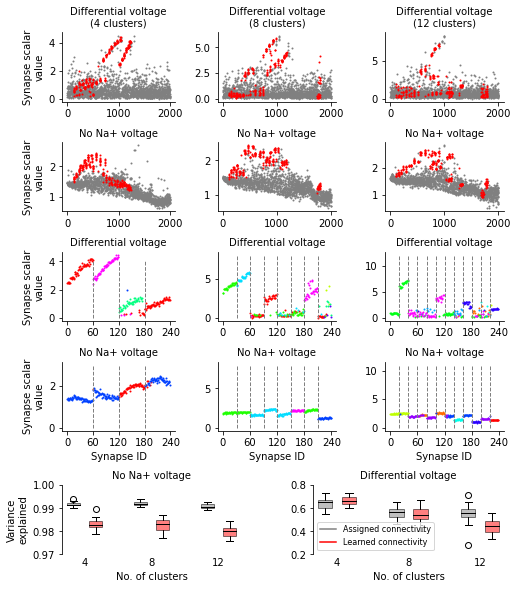

In [19]:
C4_dist_ord = np.argsort(C4_dist_raw[:2000])
C8_dist_ord = np.argsort(C8_dist_raw[:2000])
C12_dist_ord = np.argsort(C12_dist_raw[:2000])
C4_dist_ord_clust = np.isin(C4_dist_ord, np.arange(880,1120))
C8_dist_ord_clust = np.isin(C8_dist_ord, np.arange(880,1120))
C12_dist_ord_clust = np.isin(C12_dist_ord, np.arange(880,1120))
C4_dist_ord_bg = np.invert(C4_dist_ord_clust)
C8_dist_ord_bg = np.invert(C8_dist_ord_clust)
C12_dist_ord_bg = np.invert(C12_dist_ord_clust)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

fig = plt.figure(constrained_layout=True, figsize = (9,10))
gs = fig.add_gridspec(7,12, wspace=0., hspace=0.1)
ax2 = fig.add_subplot(gs[-1,:3])
ax1 = fig.add_subplot(gs[-1,3:6])
ax00 = fig.add_subplot(gs[2,:2])
ax01 = fig.add_subplot(gs[2,2:4])
ax02 = fig.add_subplot(gs[2,4:6])
ax10 = fig.add_subplot(gs[3,:2])
ax11 = fig.add_subplot(gs[3,2:4])
ax12 = fig.add_subplot(gs[3,4:6])
ax20 = fig.add_subplot(gs[4,:2])
ax21 = fig.add_subplot(gs[4,2:4])
ax22 = fig.add_subplot(gs[4,4:6])
ax30 = fig.add_subplot(gs[5,:2])
ax31 = fig.add_subplot(gs[5,2:4])
ax32 = fig.add_subplot(gs[5,4:6])

ax00.scatter(np.arange(2000)[C4_dist_ord_bg], C4_diff_scale[C4_dist_ord][C4_dist_ord_bg], s=1, color='gray')
ax00.scatter(np.arange(2000)[C4_dist_ord_clust], C4_diff_scale[C4_dist_ord][C4_dist_ord_clust], s=1, color='red')
ax01.scatter(np.arange(2000)[C8_dist_ord_bg], C8_diff_scale[C8_dist_ord][C8_dist_ord_bg], s=1, color='gray')
ax01.scatter(np.arange(2000)[C8_dist_ord_clust], C8_diff_scale[C8_dist_ord][C8_dist_ord_clust], s=1, color='red')
ax02.scatter(np.arange(2000)[C12_dist_ord_bg], C12_diff_scale[C12_dist_ord][C12_dist_ord_bg], s=1, color='gray', label="Background")
ax02.scatter(np.arange(2000)[C12_dist_ord_clust], C12_diff_scale[C12_dist_ord][C12_dist_ord_clust], s=1, color='red', label="Clustered")
ax10.scatter(np.arange(2000)[C4_dist_ord_bg], C4_nona_scale[C4_dist_ord][C4_dist_ord_bg], s=1, color='gray')
ax10.scatter(np.arange(2000)[C4_dist_ord_clust], C4_nona_scale[C4_dist_ord][C4_dist_ord_clust], s=1, color='red')
ax11.scatter(np.arange(2000)[C8_dist_ord_bg], C8_nona_scale[C8_dist_ord][C8_dist_ord_bg], s=1, color='gray', label="Background")
ax11.scatter(np.arange(2000)[C8_dist_ord_clust], C8_nona_scale[C8_dist_ord][C8_dist_ord_clust], s=1, color='red', label="Clustered")
ax12.scatter(np.arange(2000)[C12_dist_ord_bg], C12_nona_scale[C12_dist_ord][C12_dist_ord_bg], s=1, color='gray')
ax12.scatter(np.arange(2000)[C12_dist_ord_clust], C12_nona_scale[C12_dist_ord][C12_dist_ord_clust], s=1, color='red')

color4 = ["#ff0000", "#ffa200", "#00ff80", "#0040ff", "#ff00ff"]
color8 = ["#ff0000","#ffa200","#bfff00","#1eff00","#00ff80","#00ddff","#0040ff","#6200ff","#ff00ff"]
color12 = ["#ff0000","#ff6a00","#ffd500","#bfff00","#55ff00","#00ff15","#00ff80","#00ffea","#00aaff",
    "#0040ff","#2b00ff","#9500ff","#ff00ff"]

for i in range(5):
    C4_diff_part_idx = np.where(C4_diff_idx[880:1120] == i)[0]
    C4_nona_part_idx = np.where(C4_nona_idx[880:1120] == i)[0]
    ax20.scatter(C4_diff_part_idx, C4_diff_scale[C4_diff_part_idx + 880], s=1, color=color4[i])
    ax30.scatter(C4_nona_part_idx, C4_nona_scale[C4_nona_part_idx + 880], s=1, color=color4[i])
for i in range(9):
    C8_diff_part_idx = np.where(C8_diff_idx[880:1120] == i)[0]
    C8_nona_part_idx = np.where(C8_nona_idx[880:1120] == i)[0]
    ax21.scatter(C8_diff_part_idx, C8_diff_scale[C8_diff_part_idx + 880], s=1, color=color8[i])
    ax31.scatter(C8_nona_part_idx, C8_nona_scale[C8_nona_part_idx + 880], s=1, color=color8[i])
for i in range(13):
    C12_diff_part_idx = np.where(C12_diff_idx[880:1120] == i)[0]
    C12_nona_part_idx = np.where(C12_nona_idx[880:1120] == i)[0]
    ax22.scatter(C12_diff_part_idx, C12_diff_scale[C12_diff_part_idx + 880], s=1, color=color12[i])
    ax32.scatter(C12_nona_part_idx, C12_nona_scale[C12_nona_part_idx + 880], s=1, color=color12[i])

ax00.set_title("Differential voltage\n(4 clusters)", fontsize=10)
ax01.set_title("Differential voltage\n(8 clusters)", fontsize=10)
ax02.set_title("Differential voltage\n(12 clusters)", fontsize=10)
ax10.set_title("No Na+ voltage", fontsize=10)
ax11.set_title("No Na+ voltage", fontsize=10)
ax12.set_title("No Na+ voltage", fontsize=10)
ax20.set_title("Differential voltage", fontsize=10)
ax21.set_title("Differential voltage", fontsize=10)
ax22.set_title("Differential voltage", fontsize=10)
ax30.set_title("No Na+ voltage", fontsize=10)
ax31.set_title("No Na+ voltage", fontsize=10)
ax32.set_title("No Na+ voltage", fontsize=10)

ax_list = [ax00, ax01, ax02,
          ax10, ax11, ax12,
          ax20, ax21, ax22,
          ax30, ax31, ax32]

for i in ax_list:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
        
ax00.set_ylabel("Synapse scalar\nvalue")
ax10.set_ylabel("Synapse scalar\nvalue")
ax20.set_ylabel("Synapse scalar\nvalue")
ax30.set_ylabel("Synapse scalar\nvalue")
ax30.set_xlabel("Synapse ID")
ax31.set_xlabel("Synapse ID")
ax32.set_xlabel("Synapse ID")

for i in range(3):  
    ax20.vlines(x=(i+1)*60, ymin=0, ymax=np.max(C4_diff_idx[880:1120]), linewidth=1, linestyle="--", color="gray")
    ax30.vlines(x=(i+1)*60, ymin=0, ymax=np.max(C4_nona_idx[880:1120]), linewidth=1, linestyle="--", color="gray")
for i in range(7):
    ax21.vlines(x=(i+1)*30, ymin=0, ymax=np.max(C8_diff_idx[880:1120]), linewidth=1, linestyle="--", color="gray")
    ax31.vlines(x=(i+1)*30, ymin=0, ymax=np.max(C8_nona_idx[880:1120]), linewidth=1, linestyle="--", color="gray")
for i in range(11):
    ax22.vlines(x=(i+1)*20, ymin=0, ymax=np.max(C12_diff_idx[880:1120]), linewidth=1, linestyle="--", color="gray")
    ax32.vlines(x=(i+1)*20, ymin=0, ymax=np.max(C12_nona_idx[880:1120]), linewidth=1, linestyle="--", color="gray")

ax20.set_xticks(np.arange(0,241,60))
ax30.set_xticks(np.arange(0,241,60))
ax21.set_xticks(np.arange(0,241,60))
ax31.set_xticks(np.arange(0,241,60))
ax22.set_xticks(np.arange(0,241,60))
ax32.set_xticks(np.arange(0,241,60))

############
############

colors=["gray", "red"]

bp = ax1.boxplot(var_exp_diff[:,:2], positions = [1,2], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
bp = ax1.boxplot(var_exp_diff[:,2:4], positions = [4,5], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
bp = ax1.boxplot(var_exp_diff[:,4:], positions = [7,8], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xticks([1.5, 4.5, 7.5])
ax1.set_xticklabels(["4", "8", "12"])
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis="x", length=0)
ax1.set_xlabel("No. of clusters")
ax1.set_ylim(0.2,0.8)
ax1.set_yticks(np.arange(0.2,0.81,0.2))


hG, = ax1.plot(1,1,'gray')
hR, = ax1.plot(1,1,'red')
ax1.legend((hG, hR),('Assigned connectivity', 'Learned connectivity'), fontsize=8)
hR.set_visible(False)
hG.set_visible(False)
ax1.set_title("Differential voltage", fontsize=10)
    
############
###########

bp = ax2.boxplot(var_exp_nona[:,:2], positions = [1,2], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
bp = ax2.boxplot(var_exp_nona[:,2:4], positions = [4,5], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
bp = ax2.boxplot(var_exp_nona[:,4:], positions = [7,8], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.tick_params(axis="x", length=0)
ax2.set_xticks([1.5, 4.5, 7.5])
ax2.set_xticklabels(["4", "8", "12"])
ax2.set_xlabel("No. of clusters")
ax2.set_ylim(0.97,1)
ax2.set_yticks(np.arange(0.97,1.005,0.01))
ax2.set_title("No Na+ voltage", fontsize=10)
ax2.set_ylabel("Variance\nexplained")

fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig8/fig8_raw.pdf", bbox_inches="tight", transparent=True)